Daily Household Transactions Analysis

This project analyzes and visualizes daily household transactions to help identify spending patterns and opportunities for cost-saving. It includes data cleaning, analysis, and visualization using Python.

In [2]:
# Import necessary libraries:-

import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

In [3]:
# Load the dataset:-

data=pd.read_csv("C:/Users/Abhijeet Kuanr/Downloads/data/Daily Household Transactions.csv")

In [14]:
data.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


Let's look at the dataset size, feature names and their types

In [15]:
data.shape

(2461, 8)

In [16]:
data.tail(5)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
2456,1/1/2015,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,1/1/2015,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,1/1/2015,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,1/1/2015,Cash,Food,NaN,tea,10.0,Expense,INR
2460,1/1/2015,Cash,Transportation,NaN,share auto - hospital to brc station,10.0,Expense,INR


In [17]:
data.columns

Index(['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount',
       'Income/Expense', 'Currency'],
      dtype='object')

In [18]:
data.dtypes

Date               object
Mode               object
Category           object
Subcategory        object
Note               object
Amount            float64
Income/Expense     object
Currency           object
dtype: object

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


Data Preprocessing

Before diving into analysis, we need to ensure our data is clean and ready for exploration. This includes parsing dates and checking for missing values.

In [20]:
data.isnull().sum()    #check for null values

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [6]:
# Fill or drop missing values
data['Category'].fillna('Unknown', inplace=True)
data.dropna(subset=['Date', 'Income/Expense', 'Amount'], inplace=True)

C:\Users\Abhijeet Kuanr\AppData\Local\Temp\ipykernel_10096\4226671118.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Category'].fillna('Unknown', inplace=True)


In [16]:
# Convert data types
date="20/09/2020"
data['Date']=pd.to_datetime(date, dayfirst=True)
data['Amount'] = data['Amount'].astype(float)

In [9]:
# Remove duplicates
data.drop_duplicates(inplace=True)

In [17]:
# Verify data types
data.dtypes

Date              datetime64[ns]
Mode                      object
Category                  object
Subcategory               object
Note                      object
Amount                   float64
Income/Expense            object
Currency                  object
dtype: object

In [ ]:
# Summary statistics
data.describe()

,Date,Amount
count,2452,2452.000000
mean,2020-09-20 00:00:00,2757.976664
min,2020-09-20 00:00:00,2.000000
25%,2020-09-20 00:00:00,35.000000
50%,2020-09-20 00:00:00,100.000000
75%,2020-09-20 00:00:00,784.500000
max,2020-09-20 00:00:00,250000.000000
std,NaN,12542.057491


In [ ]:
#Count the values of mode of payment

data['Mode'].value_counts()

Mode
Saving Bank account 1    1223
Cash                     1046
Credit Card               162
Equity Mutual Fund B       11
Share Market Trading        5
Saving Bank account 2       5
Recurring Deposit           3
Debit Card                  2
Equity Mutual Fund C        1
Equity Mutual Fund A        1
Equity Mutual Fund D        1
Fixed Deposit               1
Name: count, dtype: int64

Visualizations.

Mode of payment  vs count

C:\Users\Abhijeet Kuanr\AppData\Local\Temp\ipykernel_18684\3767793409.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = "Mode", order =


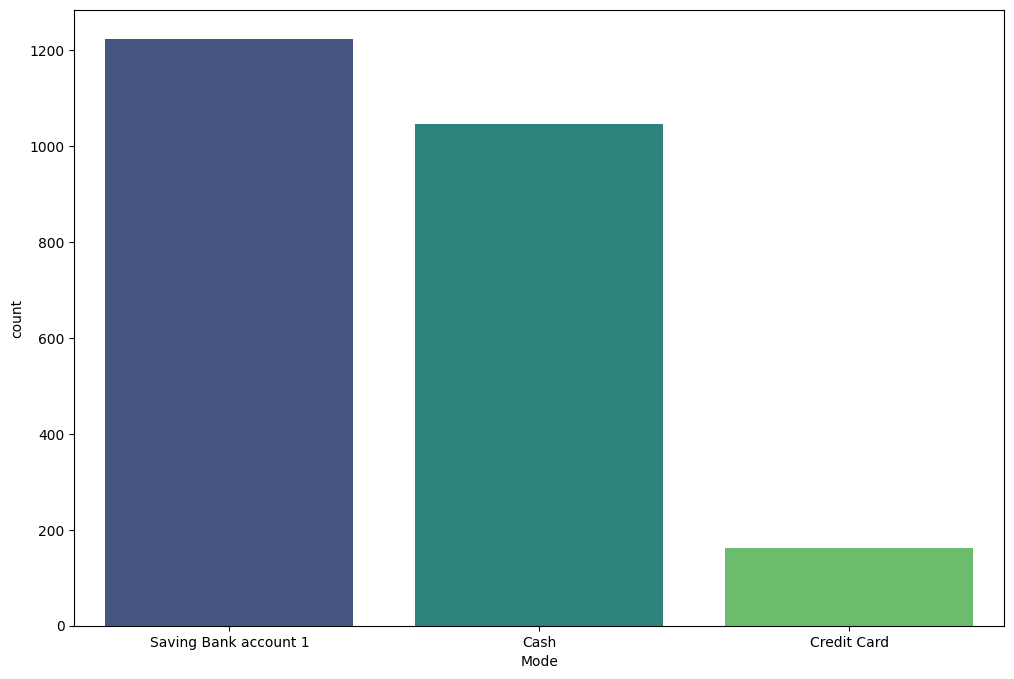

In [23]:
plt.figure(figsize = (12,8))
sns.countplot(data = data, x = "Mode", order =
data["Mode"].value_counts().iloc[:3].index, palette='viridis')
plt.show()

Inference:

The bar chart displaying the count of three different payment modes: "Saving Bank account 1," "Cash Mode," and "Credit Card."
"Saving Bank account 1" has the highest count, followed by "Cash Mode," while "Credit Card" has the lowest count.

In [24]:
data['Category'].value_counts()

Category
Food                         907
Transportation               307
Household                    176
subscription                 143
Other                        126
Investment                   103
Health                        94
Family                        71
Apparel                       47
Recurring Deposit             47
Money transfer                43
Salary                        43
Gift                          30
Public Provident Fund         29
Equity Mutual Fund E          22
Beauty                        22
Gpay Reward                   21
Education                     18
Saving Bank account 1         17
maid                          17
Festivals                     16
Equity Mutual Fund A          14
Equity Mutual Fund F          13
Dividend earned on Shares     12
Interest                      12
Culture                       11
Small Cap fund 2              10
Small cap fund 1              10
Share Market                   8
Life Insurance                 7
M

Category vs count

C:\Users\Abhijeet Kuanr\AppData\Local\Temp\ipykernel_18684\1646379374.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Category', order= data['Category'].value_counts().iloc[:5].index, palette='viridis')


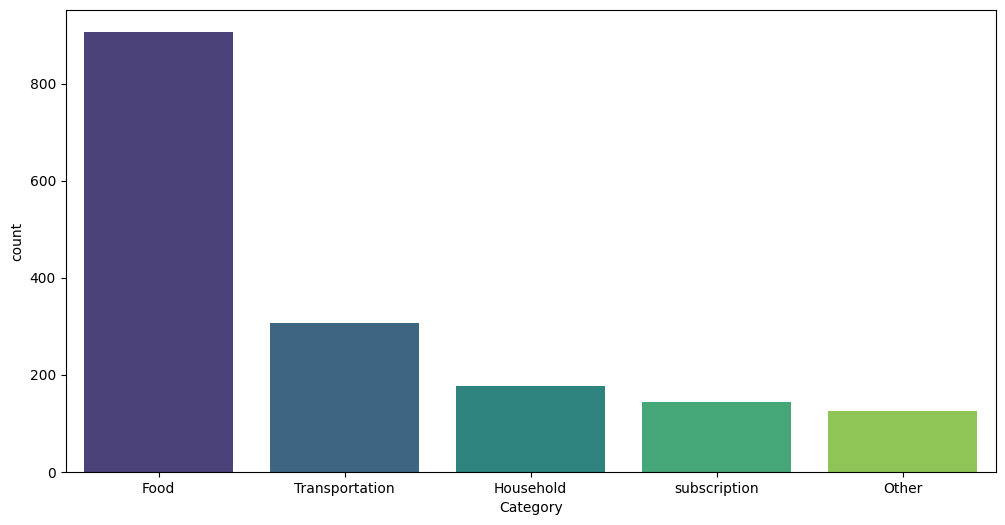

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Category', order= data['Category'].value_counts().iloc[:5].index, palette='viridis')
plt.show()

Inference:

The bar chart displaying the count of different spending categories: "Food," "Transportation," "Household," "Subscription," and "Other."
"Food" has the highest count, significantly higher than all other categories.
"Transportation" follows as the second highest, while "Household," "Subscription," and "Other" have relatively lower and similar counts.

In [34]:
data['Subcategory'].unique()

array(['Train', 'snacks', 'Netflix', 'Mobile Service Provider',
       'Ganesh Pujan', 'Tata Sky', 'auto', nan, 'Grocery', 'Lunch',
       'Milk', 'Pocket money', 'Laundry', 'breakfast', 'Dinner', 'Sweets',
       'Kirana', 'Ice cream', 'curd', 'Biscuits', 'Rajgira ladu',
       'Navratri', 'train', 'Tea', 'flour mill', 'Appliances',
       'home decor', 'grooming', 'Health', 'Clothing', 'clothes', 'Home',
       'chocolate', 'Medicine', 'Eating out', 'Movie', 'vegetables',
       'fruits', 'Potato', 'Onions', 'Taxi', 'Hardware', 'Eggs', 'Bread',
       'Petrol', 'Hospital', 'Mahanagar Gas', 'Lab Tests', 'Bus',
       'Travels', 'Kitchen', 'Footwear', 'Entry Fees', 'gadgets',
       'Accessories', 'misc', 'Stationary', 'Newspaper', 'Toiletries',
       'Bike', 'beverage', 'makeup', 'Books', 'Holi', 'Courier',
       'Leisure', 'Updation', 'Amazon Prime', 'Edtech Course', 'Hotstar',
       'Diwali', 'Wifi Internet Service', 'Trip', 'Furniture', 'Water',
       'Cable TV', 'medicine', 'M

Subcategory vs count

C:\Users\Abhijeet Kuanr\AppData\Local\Temp\ipykernel_18684\446897151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Subcategory', order=data['Subcategory'].value_counts().iloc[:10].index, palette='viridis')


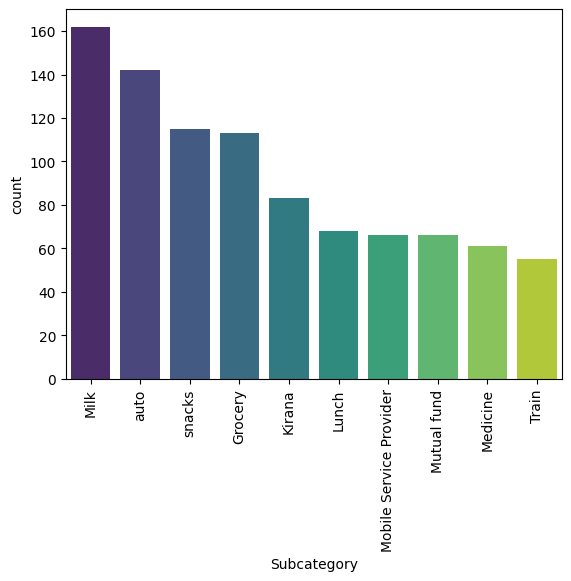

In [38]:
plt.Figure(figsize=(12,6))
sns.countplot(data=data, x='Subcategory', order=data['Subcategory'].value_counts().iloc[:10].index, palette='viridis')
plt.xticks(rotation = 90)
plt.show()

Inference:

The bar chart representing the count of different subcategories of expenses.
"Milk" has the highest count, followed by "Auto," "Snacks," and "Grocery."
Other subcategories such as "Kirana," "Lunch," "Mobile Service Provider," "Mutual Fund," "Medicine," and "Train" have relatively lower counts.
The bars are color-coded and arranged in descending order of count for better visualization.
The x-axis represents different subcategories, while the y-axis represents the count.


Income vs count

C:\Users\Abhijeet Kuanr\AppData\Local\Temp\ipykernel_18684\2282447557.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Income/Expense',palette='viridis')


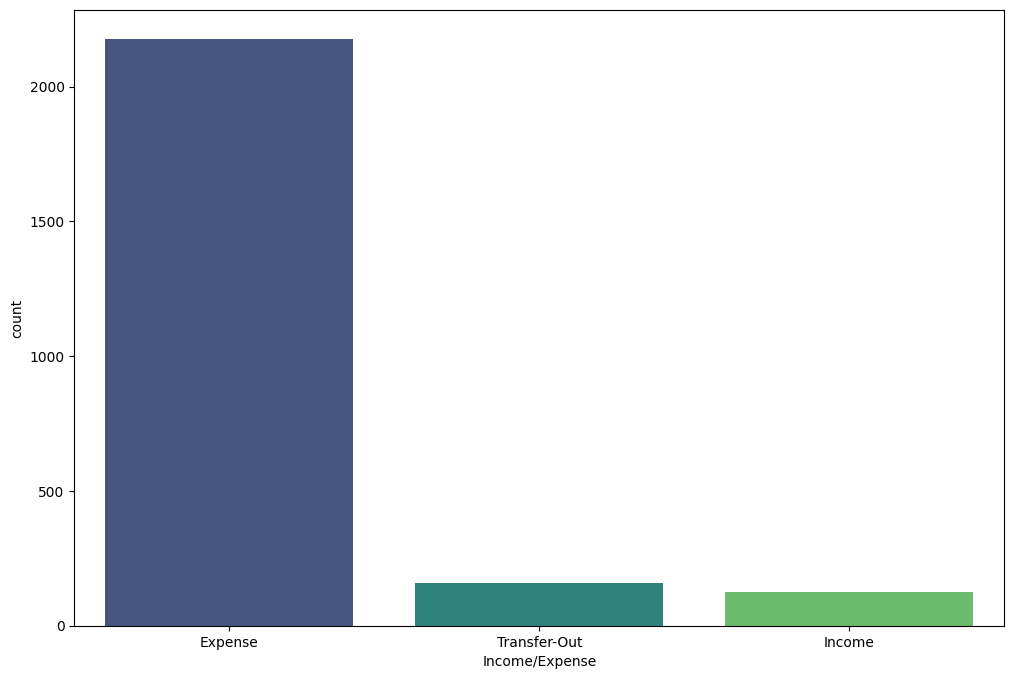

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(data=data, x='Income/Expense',palette='viridis')
plt.show()

Inference:

The bar chart comparing the counts of "Expense," "Transfer-Out," and "Income" categories.
"Expense" has the highest count, significantly larger than both "Transfer-Out" and "Income," which have relatively smaller and similar counts.

In [ ]:
data['Note'].nunique()  #Number of unique value in Column Note

1057

In [43]:
data['Currency'].value_counts()

Currency
INR    2461
Name: count, dtype: int64

Amount vs Category

C:\Users\Abhijeet Kuanr\AppData\Local\Temp\ipykernel_18684\2666319181.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x = "Amount", y = "Category", order =


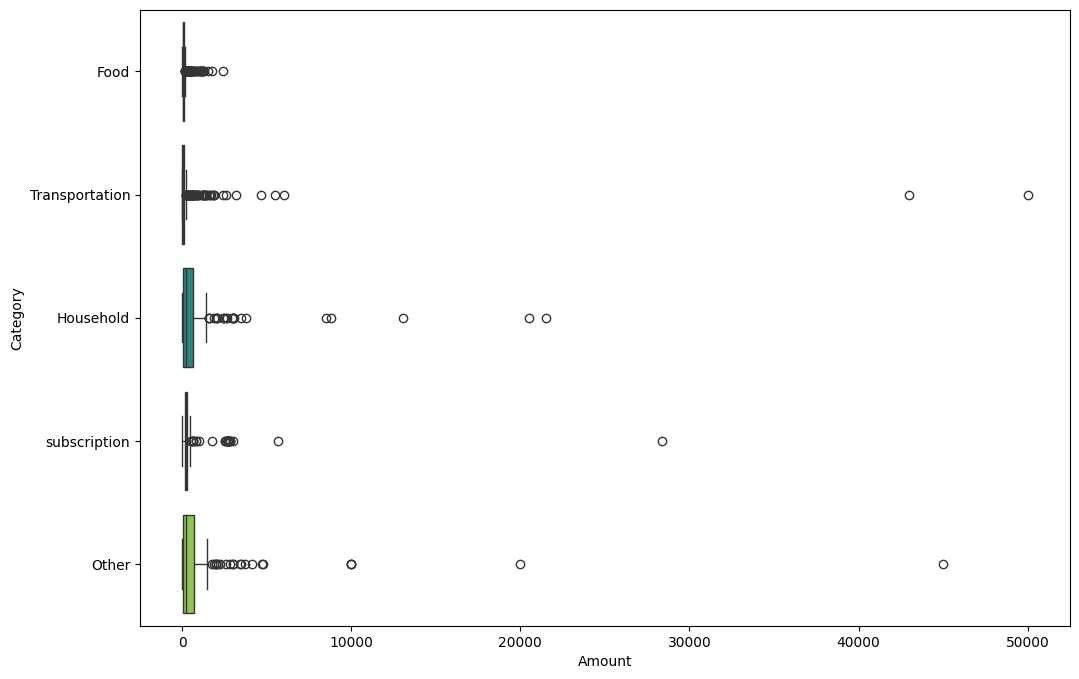

In [44]:
plt.figure(figsize = (12,8))
sns.boxplot(data = data, x = "Amount", y = "Category", order =
data["Category"].value_counts().iloc[:5].index, palette='viridis')
plt.show()

Inference:

The box plot showing the distribution of amounts across different spending categories, including Food, Transportation, Household, Subscription, and Other.
Each category has several outliers, with some extreme values reaching up to 50,000, indicating a wide range of spending variations.


Amount vs Subcategory

C:\Users\Abhijeet Kuanr\AppData\Local\Temp\ipykernel_18684\3672227187.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x = "Amount", y = "Subcategory", order =


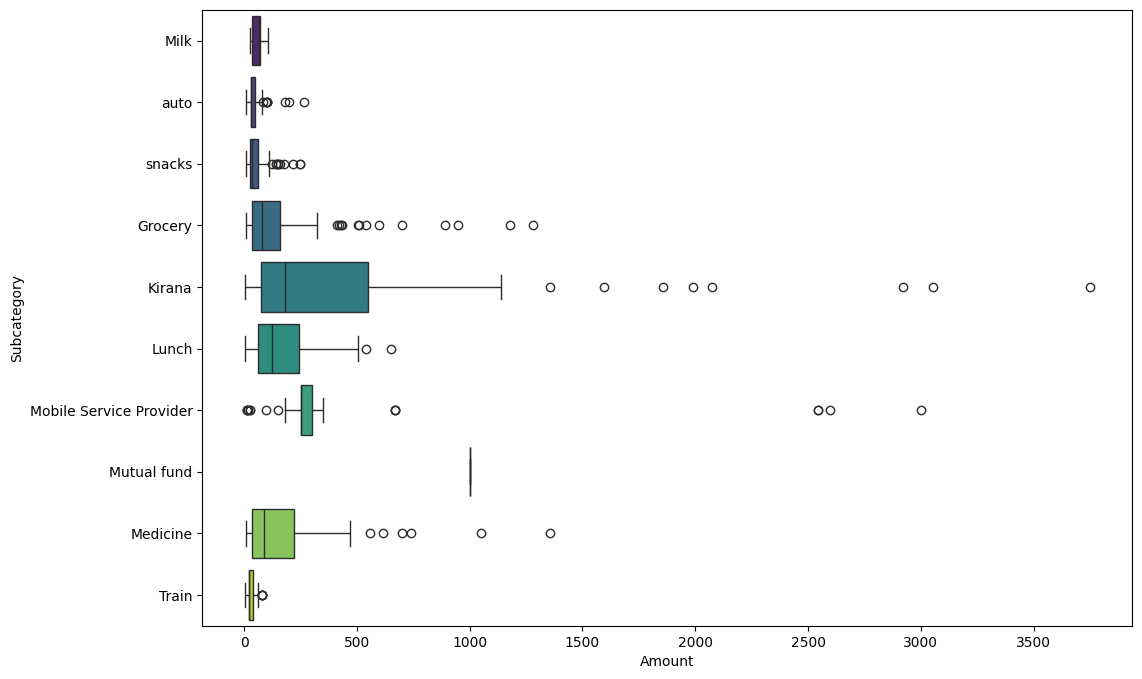

In [45]:
plt.figure(figsize = (12,8))
sns.boxplot(data = data, x = "Amount", y = "Subcategory", order =
data["Subcategory"].value_counts().iloc[:10].index,palette='viridis' )
plt.show()

Inference:

The box plot showing the distribution of spending amounts across different subcategories such as Milk, Auto, Snacks, Grocery, Kirana, Lunch, and others.
Several subcategories have significant outliers, with some transactions exceeding 3500, indicating occasional high expenditures in certain areas.

Amount vs Income

C:\Users\Abhijeet Kuanr\AppData\Local\Temp\ipykernel_18684\1122515366.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data, x = "Amount", y = "Income/Expense", palette='viridis');


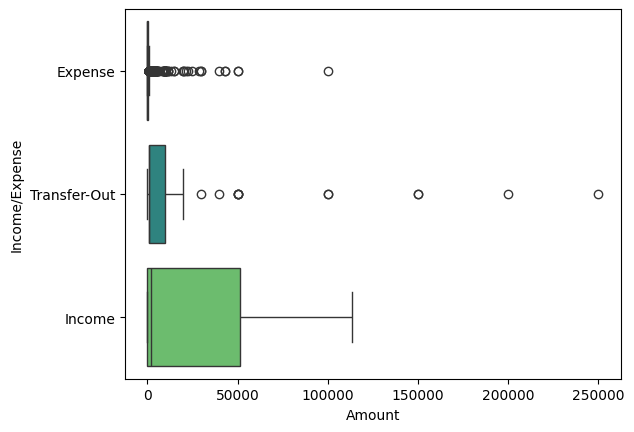

In [46]:
sns.boxplot(data = data, x = "Amount", y = "Income/Expense", palette='viridis');

Inference:

The box plot representing the distribution of amounts across three categories: Expense, Transfer-Out, and Income.
Income has a wider distribution with significant variability, while Expense and Transfer-Out have several outliers, indicating occasional large transactions.

Income vs Payment mode

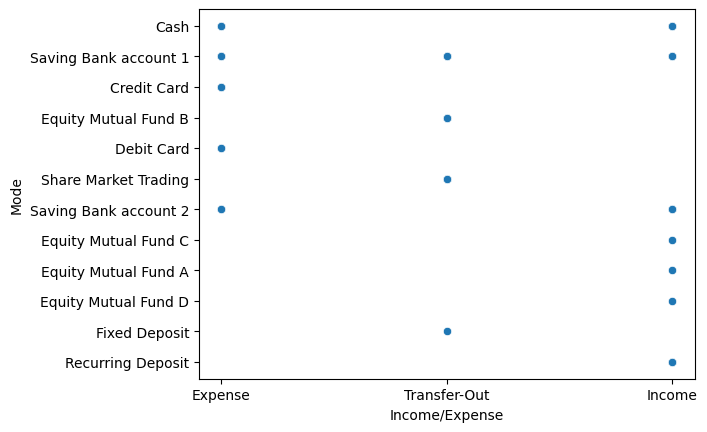

In [49]:
sns.scatterplot(data = data,x = "Income/Expense", y = "Mode",);

Inference:

The scatter plot that categorizes different transaction modes (e.g., Cash, Credit Card, Fixed Deposit) against Income, Expense, and Transfer-Out.
Each dot represents a transaction mode associated with one of these financial categories, showing which modes are used for different types of transactions.

In [ ]:
# Summary statistics
data.describe()

,Amount
count,2461.000000
mean,2751.145380
std,12519.615804
min,2.000000
25%,35.000000
50%,100.000000
75%,799.000000
max,250000.000000


Distribution of Transaction Amounts

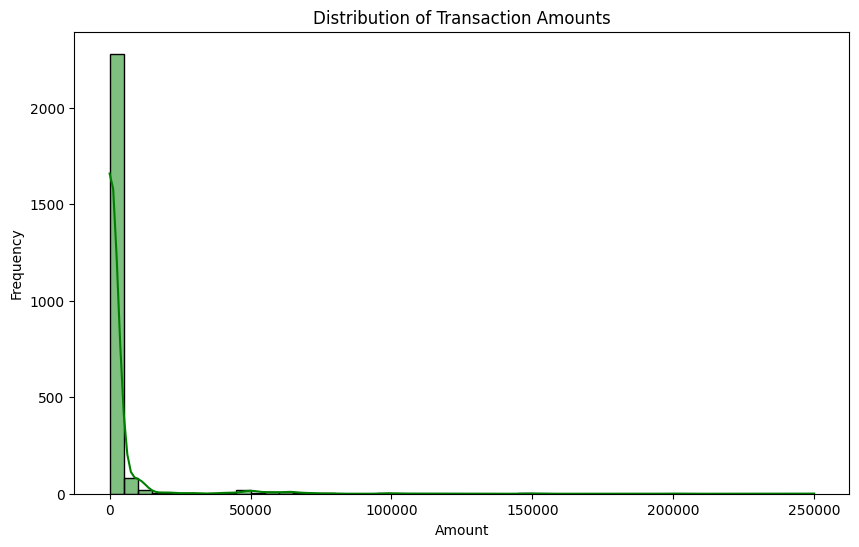

In [55]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True, color='g')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Inference:

The histogram with a KDE (Kernel Density Estimate) overlay, representing the distribution of transaction amounts.
Most transactions have low amounts, as indicated by the high frequency of small values.
There are a few high-value transactions, but they are rare, as seen in the long tail on the right.
The distribution is highly right-skewed, indicating a concentration of smaller transaction amounts.

Transaction Counts by Category

C:\Users\Abhijeet Kuanr\AppData\Local\Temp\ipykernel_18684\3692857205.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Category', order=data['Category'].value_counts().index, palette='viridis')


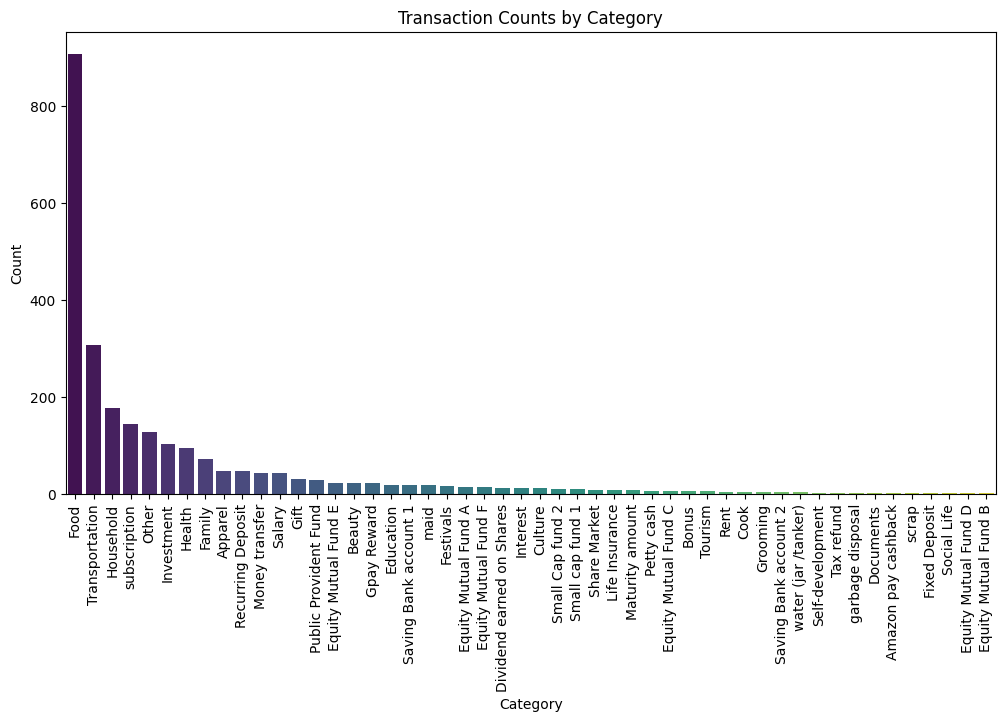

In [67]:
# Transaction counts by category
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Category', order=data['Category'].value_counts().index, palette='viridis')
plt.title('Transaction Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Inference:

The bar chart displays transaction counts categorized by different expense and income categories.
"Food" has the highest transaction count, followed by "Transportation" and "Household."
The majority of transactions are concentrated in a few categories, while others have significantly lower counts.
The distribution is highly skewed, with a long tail of categories having relatively few transactions.

In [74]:
# Create a pivot table for correlation analysis
pivot_table = data.pivot_table(index='Date', columns='Category', values='Amount',
aggfunc='sum', fill_value=0)

In [75]:
# Calculate correlation matrix
correlation_matrix = pivot_table.corr()

Correlation Heatmap of Transaction Categories

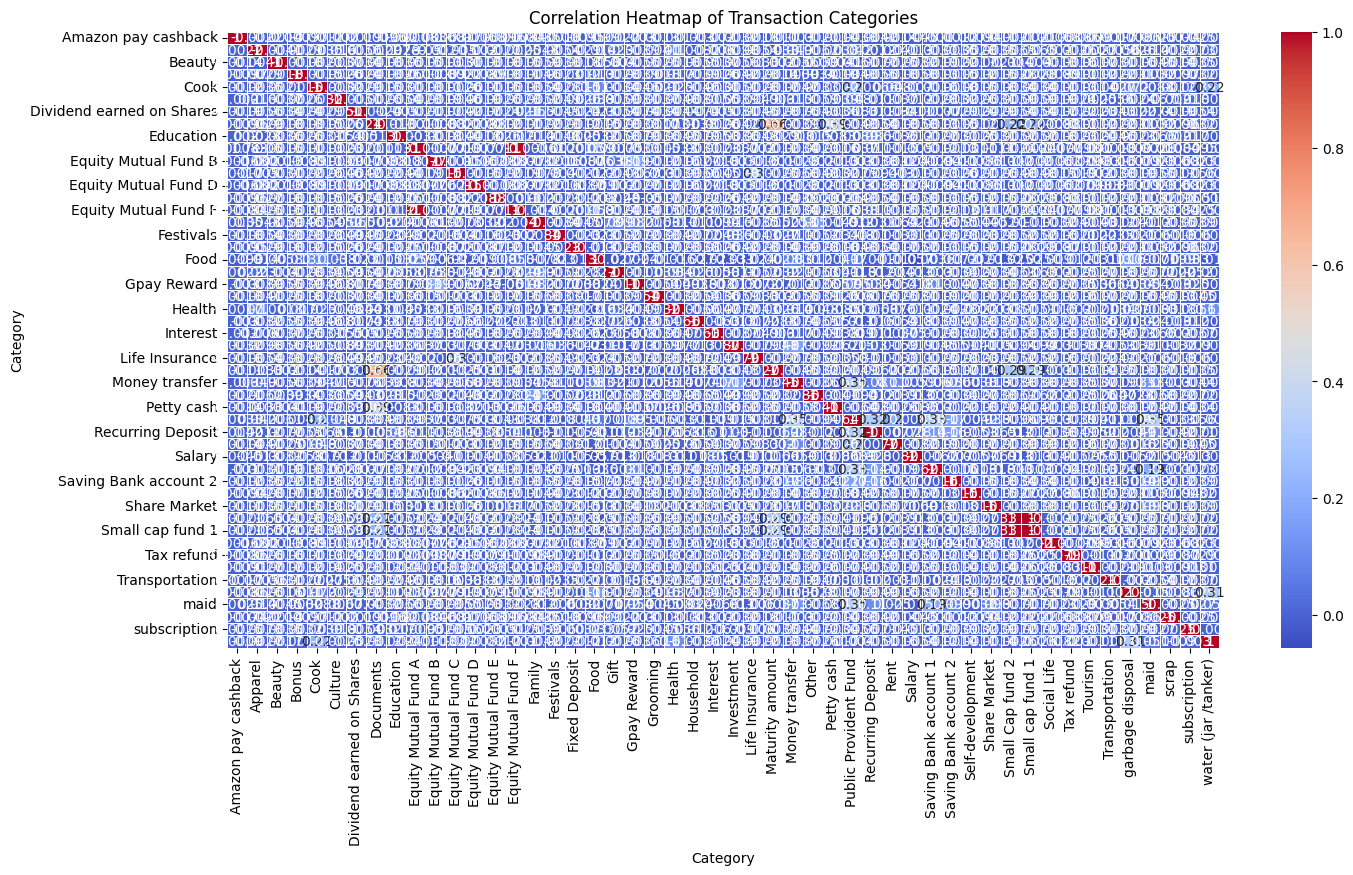

In [77]:
# Plot correlation heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Transaction Categories')
plt.show()

Inference:

The heatmap shows the correlation between different transaction categories.
The diagonal represents perfect correlation (value = 1) for each category with itself.
Some categories have strong positive correlations (red areas), indicating they often occur together.
Most correlations are weak (blue), suggesting low dependency between categories.
A few scattered moderate correlations suggest some relationships between specific categories.

Conclusion:

The financial transactions dataset was analyzed to identify key trends and insights. The
data cleaning process involved handling missing values, correcting data types, and
removing duplicates. Exploratory Data Analysis (EDA) revealed the distribution of
transaction amounts, transaction counts by category and type, and significant patterns
over time. Time series analysis highlighted monthly and daily transaction trends.
Correlation analysis identified relationships between different transaction categories.
Key Findings

● The distribution of transaction amounts showed a right-skewed pattern with most
transactions clustered around lower values.

● Sales and Purchases were the most common transaction categories.

● Credit transactions were more frequent than Debit transactions.

● Monthly transaction trends revealed seasonal patterns with peaks in certain
months.

This project provides valuable insights into daily financial transactions, helping to
inform decision-making and strategic planning.